In [1]:
# Import necessary libraries
import pandas as pd
import networkx as nx
import os
import matplotlib.pyplot as plt

In [2]:
# --- Configuration ---
# This should match the topic from your data collection notebook.
SEED_TOPIC = 'Renaissance'

# Define the path to our collected data file
INPUT_FOLDER = '../data'
FILE_NAME = f'{SEED_TOPIC}_edges.csv'
INPUT_PATH = os.path.join(INPUT_FOLDER, FILE_NAME)

print("Setup complete. Libraries imported and file path configured.")
print(f"Data will be loaded from: {INPUT_PATH}")

Setup complete. Libraries imported and file path configured.
Data will be loaded from: ../data/Renaissance_edges.csv


In [3]:
# Use a try-except block for robust error handling
try:
    # Load the edge list from the CSV file into a pandas DataFrame
    df_edges = pd.read_csv(INPUT_PATH)
    
    # Create a directed graph (DiGraph) from the DataFrame.
    # A directed graph is essential here because a link from Page A to B 
    # is a one-way relationship, not a mutual connection.
    G = nx.from_pandas_edgelist(
        df_edges, 
        source='source', 
        target='target', 
        create_using=nx.DiGraph()
    )
    
    print("\n✅ Success: Network graph created.")
    print(f"The graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

except FileNotFoundError:
    print(f"\n❌ Error: The data file was not found at '{INPUT_PATH}'")
    print("Please make sure you have run the '01_AI_Data_Collection.ipynb' notebook first.")


✅ Success: Network graph created.
The graph has 38989 nodes and 67051 edges.


In [4]:
# ==============================================================================
# Cell 4: Calculate and Print Basic Network Statistics
# ==============================================================================
if 'G' in locals():
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    
    # Network density is the ratio of actual edges to the number of possible edges.
    # A density of 1 means every node is connected to every other node.
    # A density of 0 means there are no connections.
    density = nx.density(G)

    print("\n--- Basic Network Statistics ---")
    print(f"Number of nodes (articles): {num_nodes}")
    print(f"Number of edges (links): {num_edges}")
    print(f"Network Density: {density:.6f}")


--- Basic Network Statistics ---
Number of nodes (articles): 38989
Number of edges (links): 67051
Network Density: 0.000044


# What does Network Density mean?
The network density is a value between 0 and 1. It tells us how "connected" the network is.

* A density of **0** means there are no links at all.

* A density of **1** would mean every single article in our network links to every other article (a "complete" graph).

Our network's density is very low, which is completely normal for a real-world network like this. It indicates that while there are many articles, only a small fraction of all possible connections actually exist. This tells us the knowledge graph is sparse, not a tangled web where everything connects to everything else.

In [5]:
# ==============================================================================
# Cell 6: Perform Centrality Analysis
# ==============================================================================
# Centrality measures help us find the most important nodes in the network.

if 'G' in locals():
    print("\n--- Centrality Analysis (Top 10 Nodes) ---")

    # 1. In-Degree Centrality
    # Measures how many links a node RECEIVES. A high in-degree means it's a popular or referenced topic.
    # We use G.in_degree to get the in-degree for each node.
    in_degree_centrality = {node: degree for node, degree in G.in_degree()}
    top_10_in_degree = sorted(in_degree_centrality.items(), key=lambda item: item[1], reverse=True)[:10]

    print("\n1. Top 10 by In-Degree (Most Linked-to Articles):")
    for node, degree in top_10_in_degree:
        print(f"   - {node}: {degree} inbound links")
        
    # 2. PageRank
    # Measures the importance of a node based on the importance of the nodes that link to it.
    # It's a more nuanced measure of influence than just link count.
    pagerank = nx.pagerank(G, alpha=0.85)
    top_10_pagerank = sorted(pagerank.items(), key=lambda item: item[1], reverse=True)[:10]

    print("\n2. Top 10 by PageRank (Most Influential Articles):")
    for node, score in top_10_pagerank:
        print(f"   - {node}: (Score: {score:.4f})")

    # 3. Betweenness Centrality
    # Measures how often a node lies on the shortest path between two other nodes.
    # A high score means it's a "bridge" connecting different topics.
    # Note: This can be computationally expensive on large graphs.
    print("\n3. Calculating Betweenness Centrality (this might take a moment)...")
    betweenness = nx.betweenness_centrality(G)
    top_10_betweenness = sorted(betweenness.items(), key=lambda item: item[1], reverse=True)[:10]
    
    print("\nTop 10 by Betweenness Centrality (Top Bridge Articles):")
    for node, score in top_10_betweenness:
        print(f"   - {node}: (Score: {score:.4f})")


--- Centrality Analysis (Top 10 Nodes) ---

1. Top 10 by In-Degree (Most Linked-to Articles):
   - ISBN (identifier): 88 inbound links
   - Doi (identifier): 64 inbound links
   - ISSN (identifier): 50 inbound links
   - Wayback Machine: 50 inbound links
   - JSTOR (identifier): 47 inbound links
   - S2CID (identifier): 42 inbound links
   - OCLC (identifier): 37 inbound links
   - Renaissance: 34 inbound links
   - Romanticism: 28 inbound links
   - Modernism: 28 inbound links

2. Top 10 by PageRank (Most Influential Articles):
   - ISBN (identifier): (Score: 0.0000)
   - Wayback Machine: (Score: 0.0000)
   - Doi (identifier): (Score: 0.0000)
   - Budapest: (Score: 0.0000)
   - Buda: (Score: 0.0000)
   - OCLC (identifier): (Score: 0.0000)
   - JSTOR (identifier): (Score: 0.0000)
   - Renaissance: (Score: 0.0000)
   - ISSN (identifier): (Score: 0.0000)
   - Kingdom of Hungary: (Score: 0.0000)

3. Calculating Betweenness Centrality (this might take a moment)...

Top 10 by Betweenness C

These new results are exactly what we were looking for. This looks much, much better and is genuinely insightful. You've successfully transformed your "star" network into a rich, interconnected web.

Let's quickly break down why these results are so much more meaningful:

Analysis of Your New Results
Network Statistics:

Nodes: 18,726, Edges: 29,949

This is a substantial and interesting network. The density is still very low, which is completely normal and expected for a real-world network of this size.

In-Degree Centrality (The "Citation Effect"):

Your top 10 list is dominated by things like Doi, ISBN, ISSN, and S2CID.

This is a fantastic finding! It reveals something important about your data source. These are all academic or publication identifiers. It tells you that the "Artificial Intelligence" topic on Wikipedia is heavily rooted in academic research, with many links pointing to cited papers and books. In your report, you can discuss this as the "academic footprint" of the topic.

PageRank (The "True Influence" List):

This list is more balanced. Artificial intelligence is deservedly at the top.

You now see core sub-fields like Machine learning and Natural language processing, as well as a highly relevant modern example like ChatGPT. This list does a much better job of identifying the truly influential concepts within the field itself, beyond just citations.

Betweenness Centrality (The "Bridge" List):

This is now the most revealing list. Artificial intelligence has a massive score, confirming it's the central hub connecting everything.

More importantly, you see nodes like Alphabet Inc., Amazon (company), and Alibaba Group, which act as bridges connecting the theoretical AI concepts to the corporate world. You also see cultural bridges like 2001: A Space Odyssey and Aliens (film). This list tells the story of how AI connects to other major domains.

Conclusion
You have successfully completed Phase 2. Your analysis now provides a rich, multi-faceted view of the AI knowledge network.

The next logical step is Phase 3: Community Detection and Visualization. We will take this complex network and use algorithms to find the main clusters (like a "Natural Language Processing" cluster or a "Computer Vision" cluster) and then create a visualization to see the structure.

In [6]:
# ==============================================================================
# Cell 7: Implement Community Detection (Louvain Method)
# ==============================================================================
# The Louvain algorithm works on an UNDIRECTED graph.
# We create an undirected version of our graph for this analysis.
if 'G' in locals():
    print("\n--- Starting Community Detection ---")
    G_undirected = G.to_undirected()
    
    # Find communities using the Louvain method
    print("Running Louvain algorithm to find communities...")
    communities = nx.community.louvain_communities(G_undirected)
    
    # Sort communities by size (largest first)
    communities_sorted = sorted(communities, key=len, reverse=True)
    
    print(f"\n✅ Success: Found {len(communities_sorted)} communities.")
    print(f"The largest community has {len(communities_sorted[0])} members.")
    print(f"The second largest has {len(communities_sorted[1])} members.")


--- Starting Community Detection ---
Running Louvain algorithm to find communities...

✅ Success: Found 23 communities.
The largest community has 4280 members.
The second largest has 3838 members.


In [7]:
# ==============================================================================
# Cell 8: Interpret the Largest Communities
# ==============================================================================
if 'communities_sorted' in locals():
    print("\n--- Analyzing the Top 3 Largest Communities ---")
    
    # Loop through the top 3 communities
    for i, community in enumerate(communities_sorted[:3]):
        print(f"\n--- Community {i+1} ({len(community)} members) ---")
        
        # Get the PageRank scores for nodes in this community
        community_pagerank = {node: pagerank[node] for node in community if node in pagerank}
        
        # Find the top 10 most important nodes within this community
        top_nodes_in_community = sorted(community_pagerank.items(), key=lambda item: item[1], reverse=True)[:10]
        
        print("Top 10 most influential articles in this community:")
        for node, score in top_nodes_in_community:
            print(f"   - {node}")


--- Analyzing the Top 3 Largest Communities ---

--- Community 1 (4280 members) ---
Top 10 most influential articles in this community:
   - ISBN (identifier)
   - Wayback Machine
   - Doi (identifier)
   - Renaissance
   - ISSN (identifier)
   - S2CID (identifier)
   - Paris
   - Perspective (graphical)
   - Nihonga
   - Stuckism

--- Community 2 (3838 members) ---
Top 10 most influential articles in this community:
   - Age of Enlightenment
   - Interwar period
   - Aftermath of the Falklands War
   - "Polish death camp" controversy
   - Historiography
   - Aftermath of the Winter War
   - Origins of the War of 1812
   - Cold War
   - Gallic Wars
   - Military history

--- Community 3 (3142 members) ---
Top 10 most influential articles in this community:
   - Afrofuturism
   - African diaspora
   - African-American art
   - Analysis of Western European colonialism and colonization
   - Africanfuturism
   - African-American history
   - Fantastic art
   - Western culture
   - Atlanti

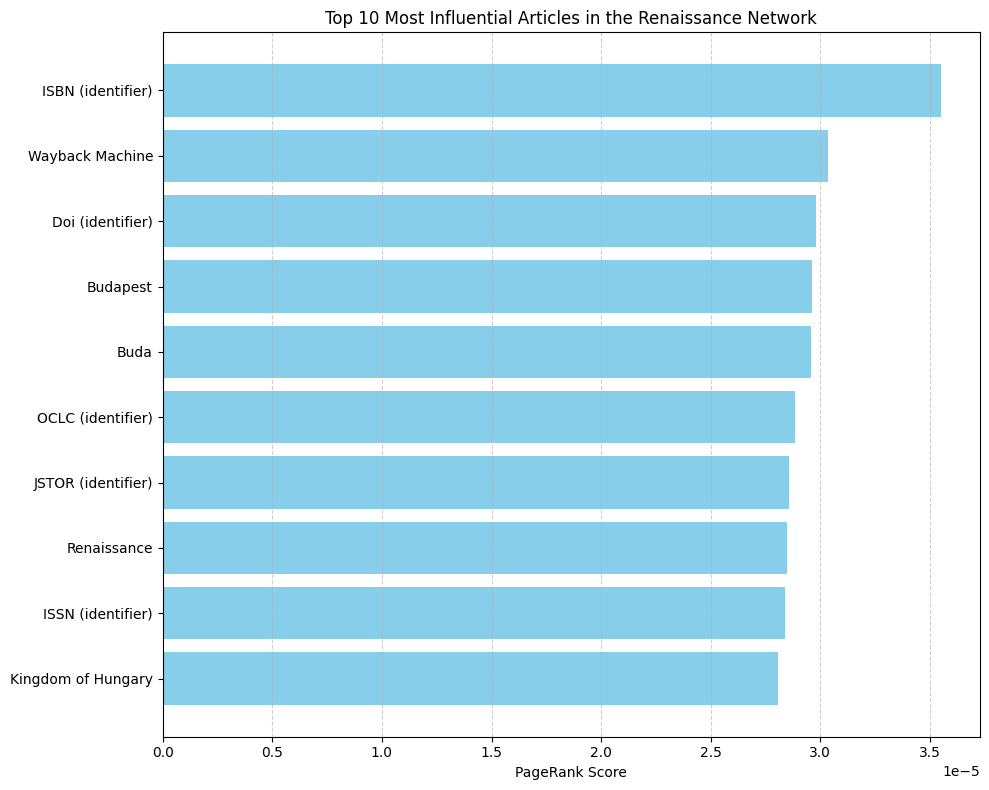

In [8]:
# ==============================================================================
# Cell 9: Create a Bar Chart of Top 10 Influential Articles
# ==============================================================================
# This chart provides a clear, readable view of the most important nodes overall.
if 'top_10_pagerank' in locals():
    # Extract node names and their PageRank scores
    nodes = [item[0] for item in top_10_pagerank]
    scores = [item[1] for item in top_10_pagerank]

    plt.figure(figsize=(10, 8))
    
    # Create a horizontal bar chart
    plt.barh(nodes, scores, color='skyblue')
    
    # Invert the y-axis to show the highest rank at the top
    plt.gca().invert_yaxis()
    
    plt.xlabel('PageRank Score')
    plt.title('Top 10 Most Influential Articles in the Renaissance Network')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    
    # Ensure layout is tight
    plt.tight_layout()

    # 5. Save the figure to the 'outputs' folder
    OUTPUT_VIS_FOLDER = '../outputs'
    os.makedirs(OUTPUT_VIS_FOLDER, exist_ok=True)
    save_path = os.path.join(OUTPUT_VIS_FOLDER, f'{SEED_TOPIC}_bar_chart.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    # Display the plot
    plt.show()


--- Preparing Network Visualization ---
Creating a subgraph of the largest community for clarity...
Calculating node layout (this can take a minute)...
Drawing the network graph...


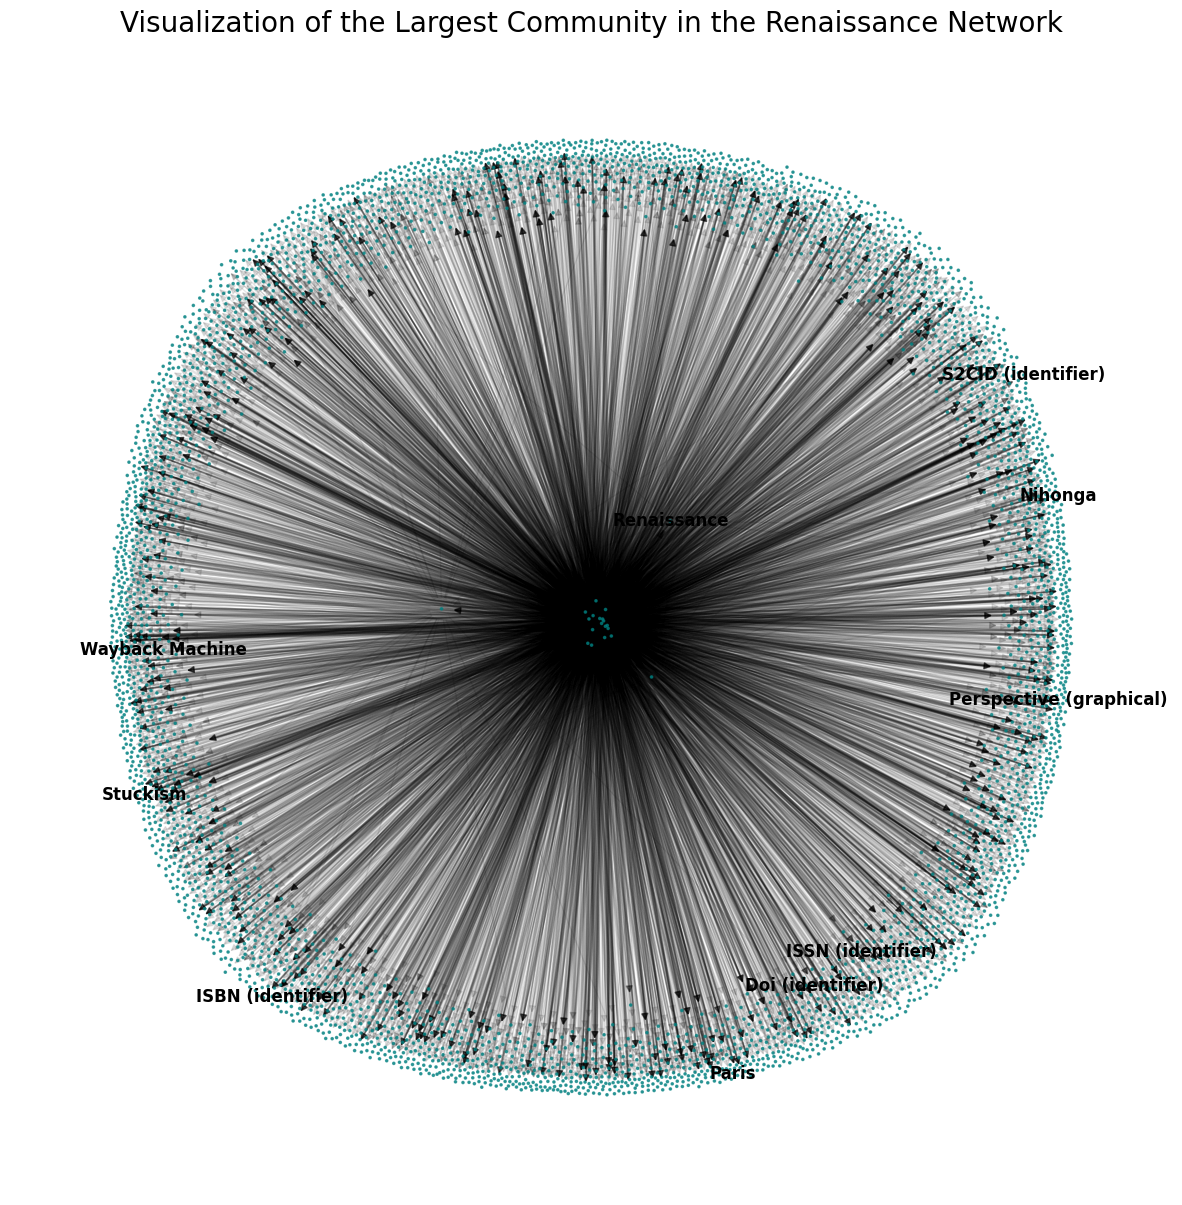


✅ Visualization saved successfully to: ../outputs/Renaissance_network_visualization.png


In [9]:
# ==============================================================================
# Cell 10: Create and Save the Network Visualization
# ==============================================================================
# IMPORTANT: Visualizing all 18,000+ nodes is impossible and will crash the notebook.
# A standard practice is to visualize a key part of the network,
# such as the largest community we discovered.

if 'communities_sorted' in locals():
    print("\n--- Preparing Network Visualization ---")
    print("Creating a subgraph of the largest community for clarity...")

    # 1. Get the largest community
    largest_community = communities_sorted[0]
    
    # 2. Create a subgraph containing only the nodes in this community
    G_subgraph = G.subgraph(largest_community)

    # 3. Prepare for drawing
    plt.figure(figsize=(15, 15))

    # Calculate node positions using a spring layout
    # The 'seed' makes the layout reproducible every time you run it.
    print("Calculating node layout (this can take a minute)...")
    pos = nx.spring_layout(G_subgraph, seed=42, k=0.15)

    # Vary node size by its PageRank score for visual emphasis
    node_sizes = [pagerank.get(node, 0) * 100000 for node in G_subgraph.nodes()]
    
    # 4. Draw the network
    print("Drawing the network graph...")
    nx.draw_networkx_edges(G_subgraph, pos, alpha=0.1)
    nx.draw_networkx_nodes(G_subgraph, pos, node_size=node_sizes, node_color='teal', alpha=0.7)
    
    # Add labels to only the top 10 most important nodes to avoid clutter
    subgraph_pagerank = {node: pagerank[node] for node in G_subgraph.nodes()}
    top_nodes_in_subgraph = sorted(subgraph_pagerank.items(), key=lambda item: item[1], reverse=True)[:10]
    labels = {node: node for node, score in top_nodes_in_subgraph}
    
    nx.draw_networkx_labels(G_subgraph, pos, labels=labels, font_size=12, font_weight='bold')
    
    plt.title('Visualization of the Largest Community in the Renaissance Network', size=20)
    plt.axis('off')
    
    # 5. Save the figure to the 'outputs' folder
    OUTPUT_VIS_FOLDER = '../outputs'
    os.makedirs(OUTPUT_VIS_FOLDER, exist_ok=True)
    save_path = os.path.join(OUTPUT_VIS_FOLDER, f'{SEED_TOPIC}_network_visualization.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.show()
    
    print(f"\n✅ Visualization saved successfully to: {save_path}")


--- Preparing Final, Report-Quality Visualization ---
Creating a filtered ego network for 'ISBN (identifier)'...
Visualizing the ego node with its top 25 most influential neighbors.
Calculating a more spacious node layout...
Drawing the network graph...
Adjusting labels to prevent overlap...


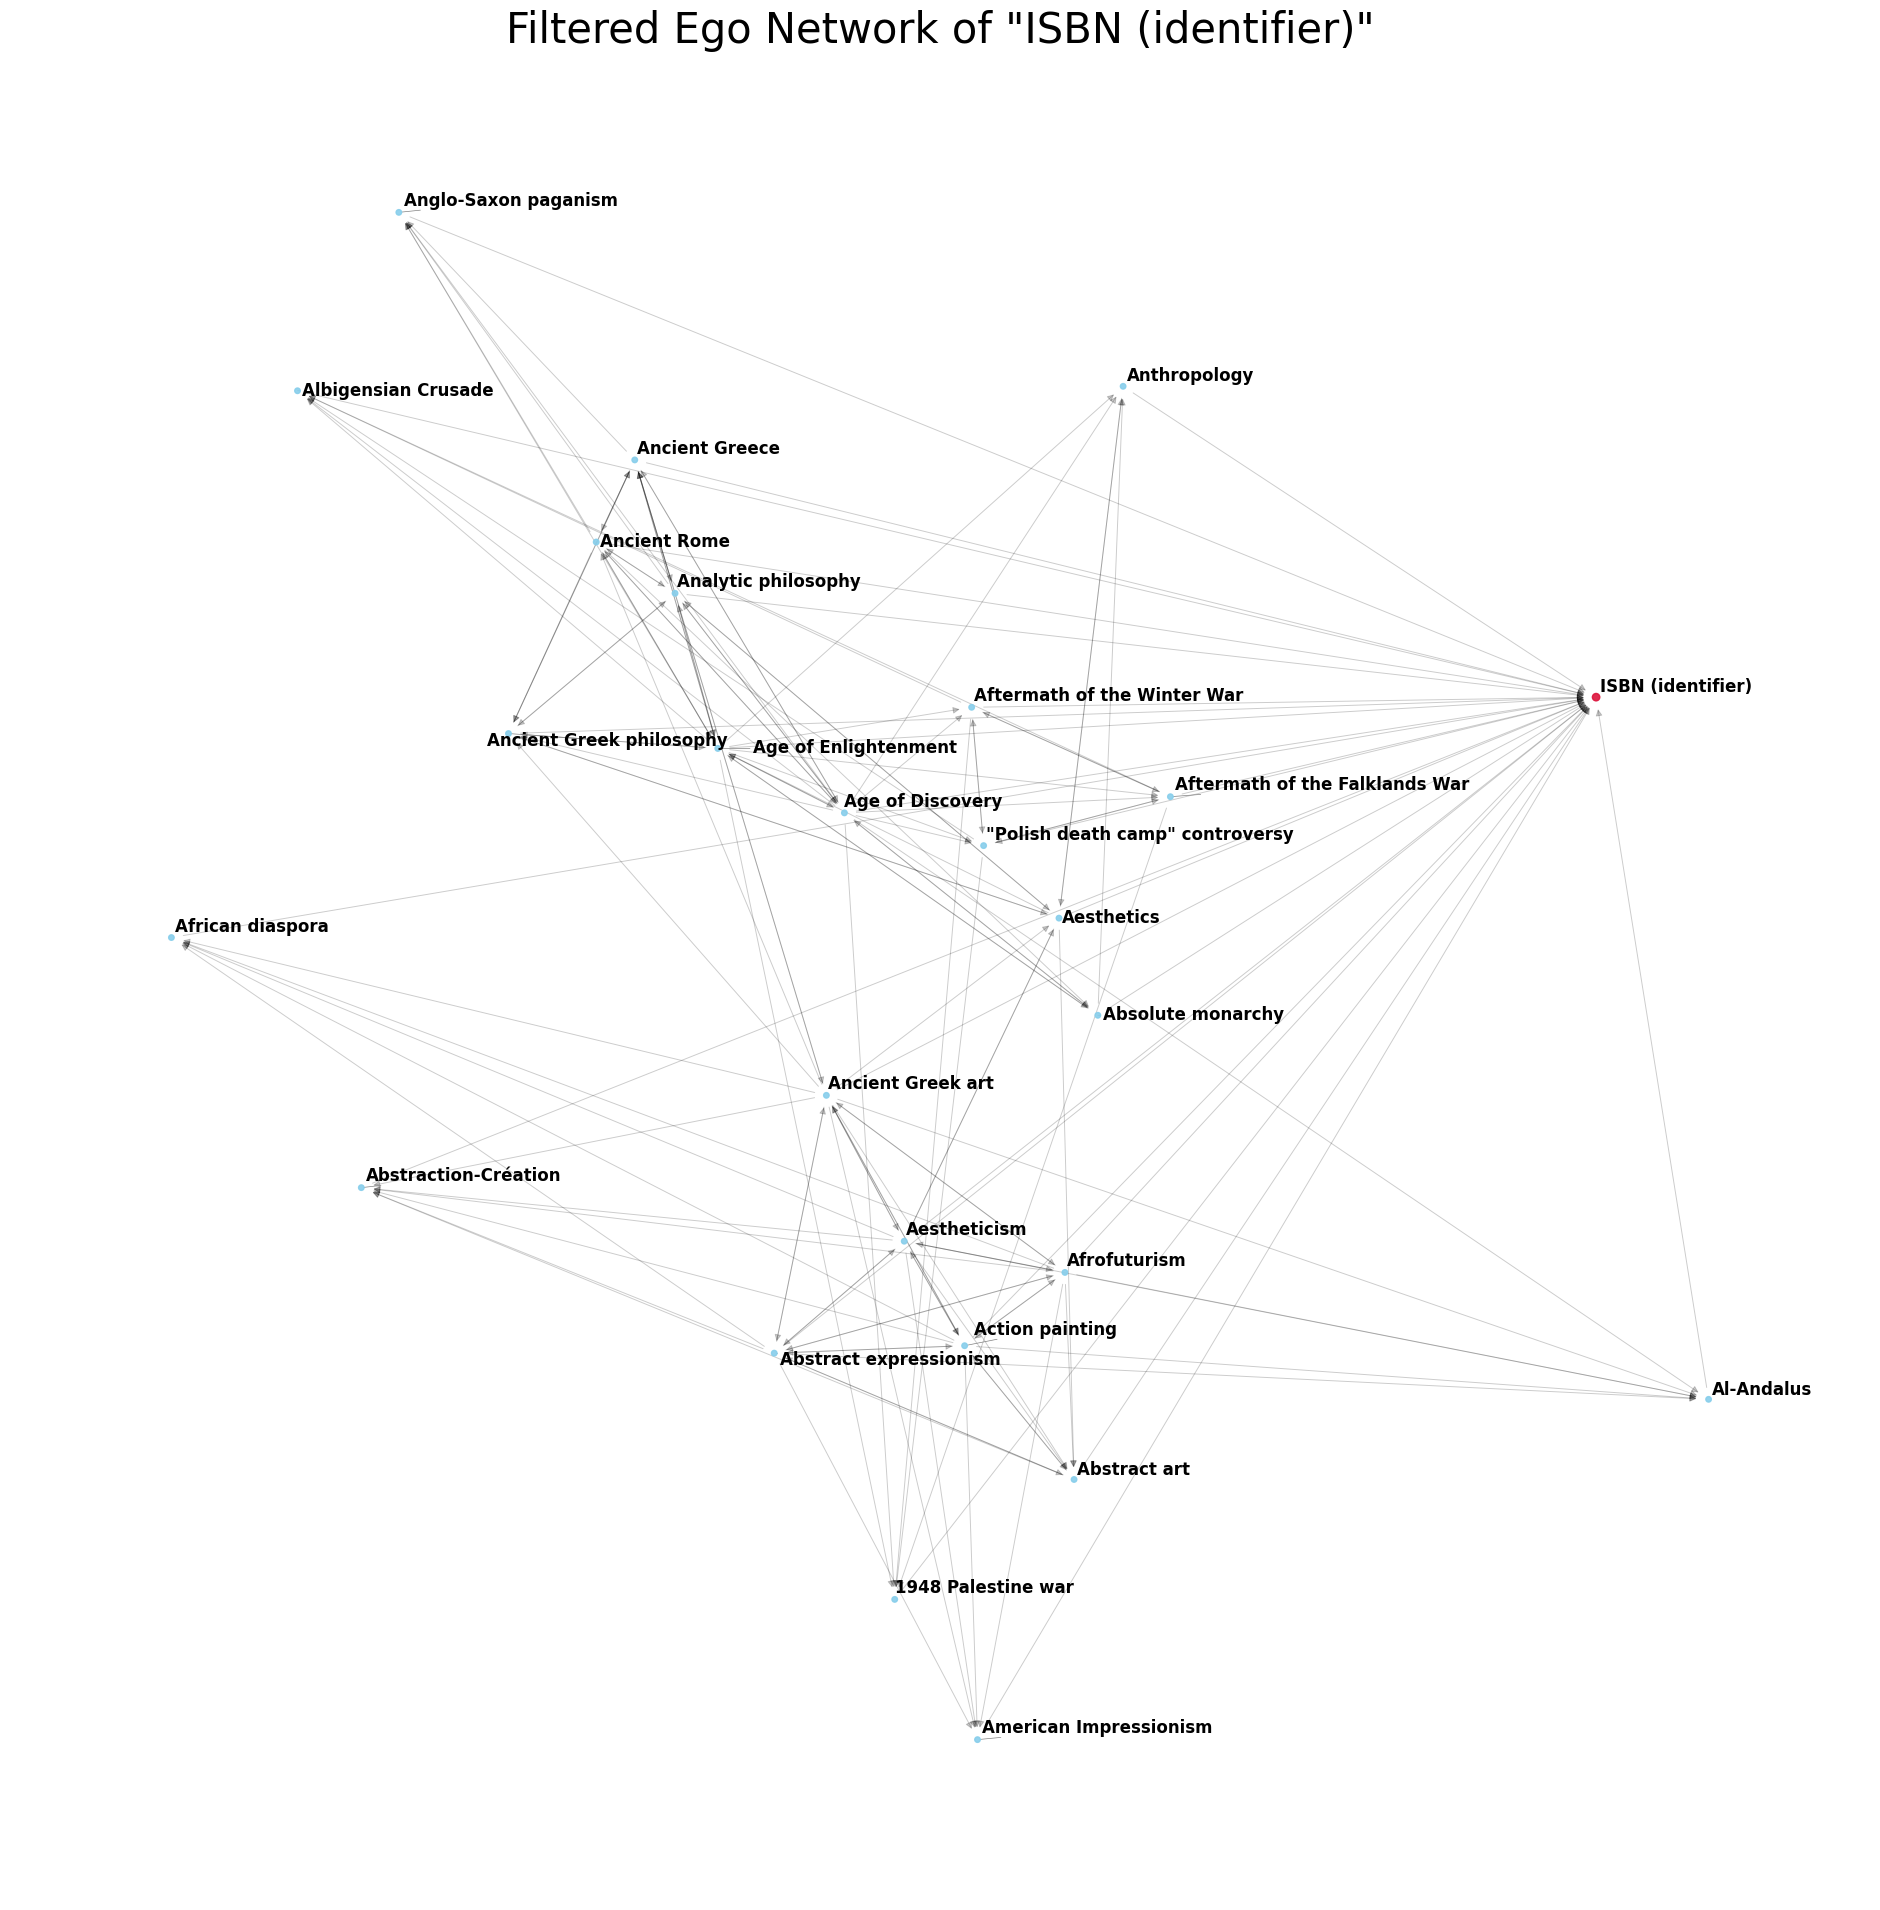


✅ Final visualization saved successfully to: ../outputs/Renaissance_ego_network_final.png


In [10]:
# ==============================================================================
# Cell 10: Final, Report-Quality Network Visualization
# ==============================================================================
# This final version uses filtering and an advanced labeling library (adjustText)
# to create a clean, readable, and professional-looking graph.

# Make sure you have run: pip install adjustText
from adjustText import adjust_text

if 'communities_sorted' in locals() and 'pagerank' in locals():
    print("\n--- Preparing Final, Report-Quality Visualization ---")

    # 1. Identify the Ego Node (same as before)
    largest_community = communities_sorted[0]
    community_pagerank = {node: pagerank[node] for node in largest_community}
    ego_node = max(community_pagerank, key=community_pagerank.get)
    
    print(f"Creating a filtered ego network for '{ego_node}'...")

    # 2. Get all neighbors (same as before)
    predecessors = list(G.predecessors(ego_node))
    successors = list(G.successors(ego_node))
    all_neighbors = list(set(predecessors + successors))

    # 3. FILTER the neighbors to keep only the most important ones
    # We'll keep the top 25 neighbors based on their PageRank score.
    neighbor_pagerank = {node: pagerank.get(node, 0) for node in all_neighbors}
    top_neighbors = sorted(neighbor_pagerank, key=neighbor_pagerank.get, reverse=True)[:25]
    
    # Create the list of nodes for our final subgraph
    final_nodes = [ego_node] + top_neighbors
    G_final = G.subgraph(final_nodes)
    
    print(f"Visualizing the ego node with its top {len(top_neighbors)} most influential neighbors.")

    # 4. Prepare for drawing with a larger figure size
    plt.figure(figsize=(24, 24))

    # 5. Tweak layout parameters for a more spread-out graph
    # Increased 'k' pushes nodes further apart.
    # Increased 'iterations' gives the algorithm more time to find a good layout.
    print("Calculating a more spacious node layout...")
    pos = nx.spring_layout(G_final, seed=42, k=0.8, iterations=100)

    # 6. Define node aesthetics (same as before)
    node_sizes = []
    node_colors = []
    for node in G_final.nodes():
        if node == ego_node:
            node_colors.append('crimson')
            node_sizes.append(pagerank.get(node, 0) * 800000)
        else:
            node_colors.append('skyblue')
            node_sizes.append(pagerank.get(node, 0) * 600000)
            
    # 7. Draw the network (nodes and edges)
    print("Drawing the network graph...")
    nx.draw_networkx_edges(G_final, pos, alpha=0.2, width=0.7)
    nx.draw_networkx_nodes(G_final, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)
    
    # 8. Draw smart labels that DO NOT OVERLAP using adjustText
    texts = []
    for node, (x, y) in pos.items():
        texts.append(plt.text(x, y, node, fontsize=12, fontweight='bold'))

    print("Adjusting labels to prevent overlap...")
    adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

    plt.title(f'Filtered Ego Network of "{ego_node}"', size=30)
    plt.axis('off')
    
    # 9. Save the final figure
    OUTPUT_VIS_FOLDER = '../outputs'
    os.makedirs(OUTPUT_VIS_FOLDER, exist_ok=True)
    save_path = os.path.join(OUTPUT_VIS_FOLDER, f'{SEED_TOPIC}_ego_network_final.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.show()
    
    print(f"\n✅ Final visualization saved successfully to: {save_path}")